In [1]:
#problem b
import numpy
import urllib
import scipy.optimize
import random
from sklearn.decomposition import PCA
from collections import defaultdict


### Network visualization ###
import networkx as nx
import matplotlib.pyplot as plt

# Karate club
G = nx.karate_club_graph()
nx.draw(G)
plt.show()
plt.clf()


import urllib.request
url="http://jmcauley.ucsd.edu/cse255/data/facebook/egonet.txt"
data=urllib.request.urlopen(url).read()
list1 = data.decode('ascii').split('\n')
list1.remove('')

<Figure size 640x480 with 1 Axes>

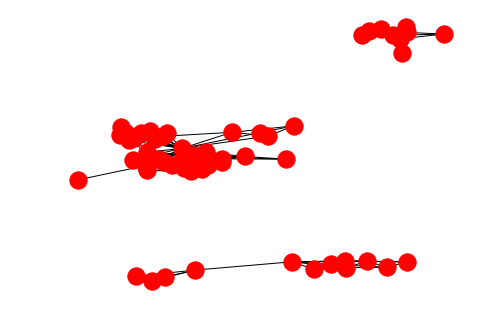

number of components is  3


<Figure size 432x288 with 0 Axes>

In [2]:
#question 5
edges = set()
nodes = set()
for edge in list1:
    x,y = edge.split(' ')
    x,y = int(x),int(y)
    edges.add((x,y))
    edges.add((y,x))
    nodes.add(x)
    nodes.add(y)
G = nx.Graph()
for e in edges:
    G.add_edge(e[0],e[1])
nx.draw(G)
plt.show()
plt.clf()
num_components = nx.number_connected_components(G)
print('number of components is ',num_components)

In [3]:
max_components =max(nx.connected_components(G),key =len)
print('the number of nodes in the largest components  is ',len(max_components))

the number of nodes in the largest components  is  40


In [4]:
#question 6
max_components_subgraphs =max(nx.connected_component_subgraphs(G),key =len)
G_list = list(max_components_subgraphs.node())
new_list = sorted(G_list)


In [5]:
low_list = new_list[:int(len(new_list)/2)]
high_list = new_list[int(len(new_list)/2):]
N_cut = (nx.cut_size(max_components_subgraphs, low_list, high_list)/sum([max_components_subgraphs.degree(v) for v in low_list])+nx.cut_size(max_components_subgraphs, low_list, high_list)/sum([max_components_subgraphs.degree(v) for v in high_list]))/2
print(N_cut)

0.42240587695133147


In [6]:
#question 7
def N_cut(a,b):
    N = (nx.cut_size(max_components_subgraphs, a, b)/sum([max_components_subgraphs.degree(v) for v in a])+nx.cut_size(max_components_subgraphs, a, b)/sum([max_components_subgraphs.degree(v) for v in b]))/2
    return N

In [7]:
list1 = low_list
list2 = high_list
list3 = []
list_seq1 =[]
list_seq2 =[]
N_cut_list = []
N_cut_list_set1 = []
N_cut_list_set2 =[]
compare_value =1

for j in range(20)   :   
    for i in range(len(list2)):
        list1.append(list2[i])
        list_seq1.append(list2[i])
        list2.remove(list2[i])
        N_cut_list_set1.append(N_cut(list1,list2))
        list2.append(list1[len(list1)-1])
        list1.remove(list1[len(list1)-1])
    for i in range(len(list1)):
        list2.append(list1[i])
        list_seq2.append(list1[i])
        list1.remove(list1[i])
        N_cut_list_set2.append(N_cut(list1,list2))
        list1.append(list2[len(list2)-1])
        list2.remove(list2[len(list2)-1])        
    min_value_1 = min(N_cut_list_set1)
    min_value_2 = min(N_cut_list_set2)
    min_value = min(min_value_1,min_value_2)
    if min_value < compare_value:
        if min_value_1 > min_value_2 :
            a = N_cut_list_set2.index(min_value)
            list2.append(list_seq2[a])
            list1.remove(list_seq2[a])
            N_cut_list_set1 =[]
            N_cut_list_set2 =[]
            list_seq1 =[]
            list_seq2 =[]
        else:
            a = N_cut_list_set1.index(min_value)
            list1.append(list_seq1[a])
            list2.remove(list_seq1[a])
            N_cut_list_set1 =[]
            N_cut_list_set2 =[]
            list_seq1 =[]
            list_seq2 =[]
        compare_value = min_value
        print(compare_value)
    

0.39084740683661895
0.352
0.32196969696969696
0.27650597001526167
0.2257691215965414
0.19539923616662225
0.14714361493576883
0.1295001295001295
0.11129580111295802
0.09817045961624274


In [8]:
print(N_cut(list1,list2))
print(list1,'     ',list2)


0.09817045961624274
[713, 830, 856, 703, 890, 811, 708, 798, 719, 828, 819, 769, 869, 805, 880, 753, 823, 810, 697, 747, 774, 800, 840, 745, 772, 803]       [876, 884, 861, 882, 878, 863, 864, 729, 886, 888, 893, 889, 825, 804]


In [10]:
#question 8
cut_size = nx.cut_size(max_components_subgraphs,list1,list2)
degree_low = sum(G_large_dic[i] for i in list1)
degree_high = sum(G_large_dic[i] for i in list2)
modularity = ((degree_low - cut_size)/440) - (degree_low/440)**2 + ((degree_high - cut_size)/440) - (degree_high/440)**2

IndexError: list index out of range

In [576]:
from networkx.algorithms.community import greedy_modularity_communities
c= list(greedy_modularity_communities(G))
c

[frozenset({697,
            703,
            708,
            713,
            719,
            745,
            747,
            772,
            774,
            800,
            803,
            805,
            810,
            819,
            823,
            828,
            830,
            840,
            880}),
 frozenset({729,
            753,
            804,
            825,
            856,
            861,
            863,
            864,
            876,
            878,
            882,
            884,
            886,
            888,
            889,
            893}),
 frozenset({857, 858, 862, 865, 866, 868, 870, 871, 879, 881, 894, 895}),
 frozenset({776, 859, 867, 872, 873, 874, 877, 885, 887}),
 frozenset({769, 798, 811, 869, 890})]